先對缺失的年齡資料進行填補並且對其他資料進行編碼，建立好訓練集和測試集後使用迴圈測試不同參數的準確度，最後得到當K值為5時準確度最佳

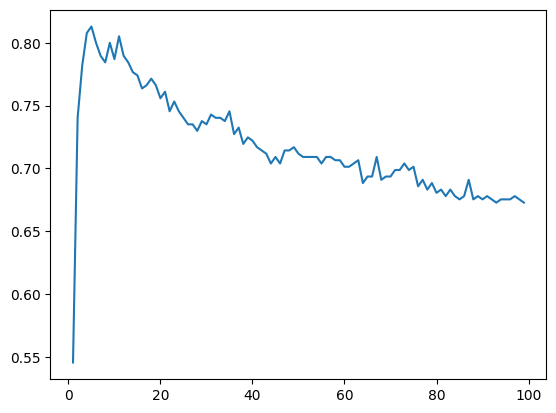

最佳K值： 5
最佳正確性： 0.812987012987013


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

df = pd.read_csv('/home/xin0/Downloads/titanic.csv')

# 填補缺失值
imputer = SimpleImputer(strategy="median") # 中位數插補
df["Age"] = imputer.fit_transform(df[["Age"]])

# 移除包含缺失值的列
df.dropna(inplace=True)

# 進行獨熱編碼
df_encoded = pd.get_dummies(df, columns=["PClass", "Sex"])

# 選擇特徵和目標變量
features = ["Age", "PClass_1st", "PClass_2nd", "PClass_3rd", "Sex_female", "Sex_male"] # 採用的特徵
target = "Survived" # 預測的目標

# 分割資料集
X = df_encoded[features]
y = df_encoded[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

optimal_k = 0
optimal_accuracy = 0
acc = []
for cur_k in range(1, 100):
    # 建立KNN分類器模型，使用迴圈測試每一個K值
    # 再使用測試資料進行估算正確率，就可以找到正確率最高的K值
    knn = KNeighborsClassifier(n_neighbors=cur_k)
    knn.fit(X_train, y_train)

    # 在測試集上進行預測
    y_pred = knn.predict(X_test)

    # 計算預測正確性
    accuracy = accuracy_score(y_test, y_pred)
    acc.append(accuracy)
    if optimal_accuracy < accuracy:
        optimal_accuracy = accuracy
        optimal_k = cur_k
i = range(1, 100)
plt.plot(i, acc)
plt.show()

print("最佳K值：", optimal_k)
print("最佳正確性：", optimal_accuracy)


由此圖可以知道，當K值等於5的時候，正確率最高，達到0.81，之後當K值越大，正確率越低。